In [125]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np

In [126]:
ques_act_ampm = pd.read_csv('../../datas/ques_act_merge/ques_act_ampm.csv')
ques_act_day = pd.read_csv('../../datas/ques_act_merge/ques_act_day.csv')
att_weather = pd.read_csv('../../datas/attribute_weater.csv')

In [127]:
ques_act_day.columns

Index(['Unnamed: 0', 'user_id', 'value_dams', 'datetime_jp', 'Date_jp',
       'hour_x', 'positive_score', 'depressive_score', 'anxious_score',
       'datetime_jp_before3', 'datetime_jp_before6', 'datetime_jp_before9',
       'datetime_jp_before12', 'datetime_jp_before24', 'meeting_ftof', 'Date',
       'activity_type_id', 'hour_y', 'am_pm', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference', 'Days_plus1'],
      dtype='object')

In [128]:
ques_act_day_corr = ques_act_day[['positive_score', 'depressive_score', 'anxious_score',
       'meeting_ftof', 'meal', 'working_alone',
       'hobby_break', 'housework_childcare', 'break', 'transfer',
       'web_conference', 'other', 'work_outsideduty', 'facetoface_meeting',
       'collaboration', 'remote_conference']]

In [129]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


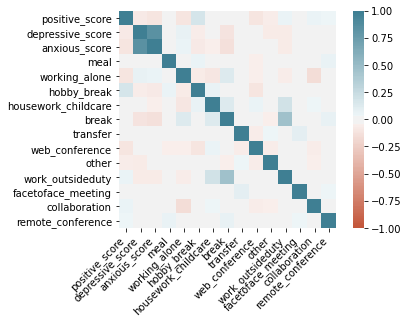

In [130]:
corr = ques_act_day_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [131]:
att_weather = att_weather[['user_id', 'sex', 'age', 'locate_id',
       'locate_name', 'Date', 'ave_temperature', 'max_temperature',
       'mini_temperature', 'sum_rainfall', 'sunlight_time', 'ave_windspeed',
       'max_windspeed', 'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18',
       'weather_18to6', 'locate']]

In [132]:
att_weather['weather_6to18'].unique()

array(['曇', 'みぞれ時々曇一時晴後雨', '晴', '曇一時晴', '曇時々晴', '晴後一時曇', '雨一時曇', '雨後時々曇',
       '晴時々曇', '雨時々曇', '曇一時晴後雨、みぞれを伴う', '曇後時々晴', 'みぞれ時々雨後曇', '晴一時曇',
       '曇後雨時々晴', 'みぞれ時々晴一時雪後曇', '雨', '曇時々晴一時雨', '雨時々曇、みぞれを伴う',
       '曇一時雨後晴、みぞれを伴う', '雨時々曇後晴', '曇後時々晴一時雨', '雪時々曇後晴', '晴後曇一時雨', '曇後時々雨',
       '雪時々曇、みぞれを伴う', '曇後晴一時雪、みぞれを伴う', '晴一時雪、みぞれを伴う', '薄曇', '快晴',
       '曇後晴一時雨', '曇後一時晴', '晴後一時薄曇', '薄曇一時晴', '晴後雪', '雨後曇', '晴一時薄曇',
       '曇時々雨', '雨後一時曇', '曇後晴', '曇一時雪', '曇一時雪後一時晴', '雪時々みぞれ後曇一時晴',
       '曇一時雪後晴', '晴後曇一時雨、みぞれを伴う', '晴時々曇、みぞれを伴う', '曇時々晴後雨', '晴時々曇一時雪',
       '晴後時々曇', 'みぞれ時々雪後曇一時雨', '雪時々晴後曇、みぞれを伴う', '曇時々雨一時晴',
       '晴一時雪後曇、みぞれを伴う', '晴時々雨一時曇', '雪後みぞれ時々曇一時雨', '雨時々曇一時晴、雷を伴う',
       '曇一時雪後晴、みぞれを伴う', '曇一時雨後時々晴', '晴後曇一時雪', '雨時々みぞれ一時曇', '雪時々曇',
       '曇時々雪一時晴', '曇後時々雨、みぞれを伴う', '雨時々晴後曇', '曇時々晴後雪、みぞれを伴う', '雪', '雪後一時曇',
       '晴時々曇一時雨', '雨後晴', '曇一時雨', '雪後晴', '雪時々曇一時晴', '雪一時晴', '曇後雨一時みぞれ',
       '曇時々雪一時みぞれ', '晴後時々薄曇', '薄曇後一時雨', '薄曇時々晴', '曇一時雪、みぞれを伴う', '曇一時雨後晴',
       '曇時々雪一時晴、みぞれを伴う', '曇一時雪後雨、雷を伴う

In [133]:
att_weather.loc[att_weather['weather_6to18'].str.contains('晴',na=False),'weather_6to18']=2
att_weather.loc[att_weather['weather_6to18'].str.contains('雪',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('雨',na=False),'weather_6to18']=0
att_weather.loc[att_weather['weather_6to18'].str.contains('曇',na=False),'weather_6to18']=1

att_weather.loc[att_weather['weather_18to6'].str.contains('晴',na=False),'weather_18to6']=2
att_weather.loc[att_weather['weather_18to6'].str.contains('雪',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('雨',na=False),'weather_18to6']=0
att_weather.loc[att_weather['weather_18to6'].str.contains('曇',na=False),'weather_18to6']=1

In [134]:
dams_score = ques_act_day[['user_id','Date_jp','positive_score','depressive_score','anxious_score']]
att_weather['Date'] = pd.to_datetime(att_weather['Date'])
dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])
dams_att_weather = pd.merge(dams_score,att_weather,left_on=['user_id','Date_jp'],right_on=['user_id','Date'],how='inner')

<ipython-input-134-754002e7b86a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dams_score['Date_jp'] = pd.to_datetime(dams_score['Date_jp'])


In [135]:
dams_att_weather.columns

Index(['user_id', 'Date_jp', 'positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 'locate_id', 'locate_name', 'Date',
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'ave_cloudcover', 'weather_6to18', 'weather_18to6',
       'locate'],
      dtype='object')

In [138]:
dams_att_weather_corr = dams_att_weather[['positive_score', 'depressive_score',
       'anxious_score', 'sex', 'age', 
       'ave_temperature', 'max_temperature', 'mini_temperature',
       'sum_rainfall', 'sunlight_time', 'ave_windspeed', 'max_windspeed',
       'ave_vaporpressure', 'weather_6to18', 'weather_18to6']]

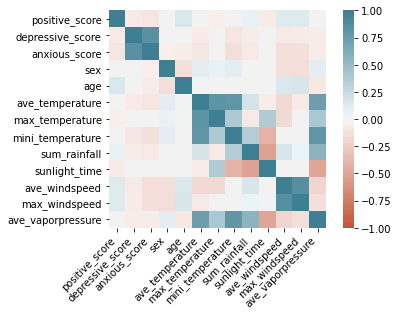

In [139]:
corr = dams_att_weather_corr.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [140]:
ques_act_day_corr

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.0,0,0.044983,0.000000,0.000000,0.00,0.0,30.000000,0.0,71.223333,0.000000,0.0,0.000000,0.0
1,3.666667,3.000000,2.0,0,6.866667,0.000000,45.633333,3.25,0.0,0.000000,0.0,0.000000,0.017717,0.0,0.000000,0.0
2,2.333333,0.000000,1.0,0,0.010333,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
3,0.333333,0.000000,4.0,0,7.967950,0.000000,0.000000,0.00,0.0,86.880667,0.0,47.286383,0.000000,0.0,0.000000,0.0
4,4.000000,3.000000,3.0,0,57.242667,0.000000,0.000000,0.00,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,6.666667,2.000000,3.0,0,0.000000,163.749867,0.000000,0.00,30.0,135.000000,0.0,0.000000,0.000000,0.0,40.026833,0.0
1135,6.666667,2.000000,3.0,0,22.000000,531.000000,0.000000,80.00,50.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,10.0
1136,3.000000,0.333333,2.0,0,25.000000,261.000000,187.987483,0.00,45.4,182.853700,211.2,0.000000,0.000000,0.0,0.000000,0.0
1137,5.000000,0.000000,0.0,0,30.000000,400.063700,0.000000,0.00,0.0,0.000000,60.0,0.000000,0.000000,0.0,0.000000,0.0


<AxesSubplot:>

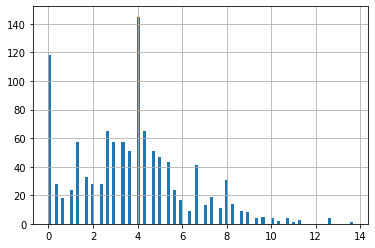

In [157]:
ques_act_day_corr['positive_score'].hist(bins=100)

In [155]:
ques_act_day_corr['positive_score'].quantile([0, 0.3, 0.5, 0.7, 1.0])

0.0     0.000000
0.3     2.666667
0.5     4.000000
0.7     4.666667
1.0    13.666667
Name: positive_score, dtype: float64

In [153]:
ques_act_day_corr[ques_act_day_corr['positive_score']<=2]
ques_act_day_corr[(ques_act_day_corr['positive_score']>2)&(ques_act_day_corr['positive_score']<5)]
ques_act_day_corr[ques_act_day_corr['positive_score']>=5]

,positive_score,depressive_score,anxious_score,meeting_ftof,meal,working_alone,hobby_break,housework_childcare,break,transfer,web_conference,other,work_outsideduty,facetoface_meeting,collaboration,remote_conference
0,5.666667,0.666667,1.000000,0,0.044983,0.000000,0.00000,0.000000,0.0,30.000000,0.0,71.223333,0.0,0.0,0.000000,0.0
8,5.333333,1.000000,1.000000,0,30.000000,0.000000,0.00000,0.000000,0.0,65.000000,0.0,0.000000,0.0,15.0,0.000000,0.0
15,5.000000,2.333333,7.000000,0,8.598783,0.000000,0.00000,0.000000,0.0,0.000000,0.0,39.610183,0.0,0.0,0.000000,0.0
17,7.666667,0.000000,0.000000,0,30.000000,0.000000,0.00000,0.000000,0.0,20.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
28,5.333333,0.333333,0.000000,0,40.168767,0.000000,0.00000,19.996717,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1132,5.000000,0.333333,0.666667,0,120.033767,464.000000,0.00000,0.000000,0.0,132.016667,0.0,0.000000,0.0,0.0,0.000000,0.0
1134,6.666667,2.000000,3.000000,0,0.000000,163.749867,0.00000,0.000000,30.0,135.000000,0.0,0.000000,0.0,0.0,40.026833,0.0
1135,6.666667,2.000000,3.000000,0,22.000000,531.000000,0.00000,80.000000,50.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,10.0
1137,5.000000,0.000000,0.000000,0,30.000000,400.063700,0.00000,0.000000,0.0,0.000000,60.0,0.000000,0.0,0.0,0.000000,0.0
